# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df["Exited"]== 0] # customers who stayed
df_1 = df[df["Exited"]== 1] # customers who left

print("Not exited customers: ",len(df_0))
print("Exited customers: ",len(df_1))

Not exited customers:  7963
Exited customers:  2037


## Hypothesis 1: Age

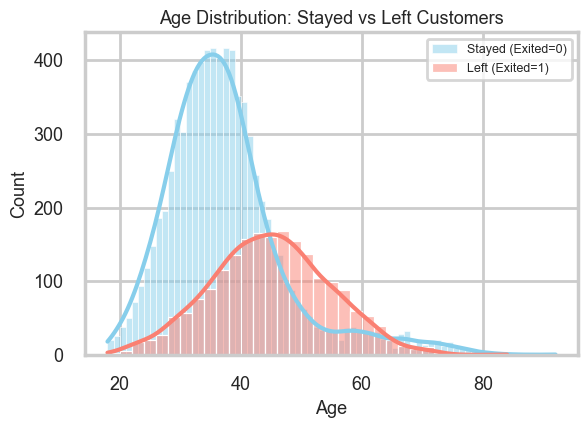

In [16]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
sns.histplot(df_0["Age"], color="skyblue", label="Stayed (Exited=0)", kde=True)
sns.histplot(df_1["Age"], color="salmon", label="Left (Exited=1)", kde=True)
plt.title("Age Distribution: Stayed vs Left Customers", fontsize=13)
plt.xlabel("Age",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.legend(fontsize =9)
plt.tight_layout()
plt.show()

In [28]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
print("Mean age of people who stayed:",df_0["Age"].mean().round(2))
print("Standard deviation:",df_0["Age"].std().round(2))

Mean age of people who stayed: 37.41
Standard deviation: 10.13


In [29]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
print("Mean age of people who left the bank:",df_1["Age"].mean().round(2))
print("Standard deviation:",df_1["Age"].std().round(2))

Mean age of people who left the bank: 44.84
Standard deviation: 9.76


In [37]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
a = df_0["Age"].dropna()
b = df_1["Age"].dropna()
t_stat,p_value = stats.ttest_ind(a,b)
print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Results:
T-statistic: -29.7668
P-value: 0.000000


### Using Bootstrapping

In [38]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size, dtype=float)
    x = np.asarray(data)
    n = x.shape[0]
    for i in range(size):
        bs_abc = np.random.choice(x, size=n, replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [40]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
mean_0 = df_0["Age"].mean()          # Stayed
mean_1 = df_1["Age"].mean()
overall_mean = df["Age"].mean()
diff_in_means = mean_1 - mean_0

#Shift each group's ages so both are centered at the overall mean

df_0["Age_shifted"] = df_0["Age"] - mean_0 + overall_mean
df_1["Age_shifted"] = df_1["Age"] - mean_1 + overall_mean
print(f"Difference in means (Left − Stayed): {diff_in_means:.2f} years")
print(f"Overall mean age: {overall_mean:.2f} years")

Difference in means (Left − Stayed): 7.43 years
Overall mean age: 38.92 years


/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_80949/2297305679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Age_shifted"] = df_0["Age"] - mean_0 + overall_mean
/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_80949/2297305679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Age_shifted"] = df_1["Age"] - mean_1 + overall_mean


In [42]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
bs_std_0 = bs_choice(df_0["Age"].dropna(), lambda x: np.std(x, ddof=1), size=5000)
bs_std_1 = bs_choice(df_1["Age"].dropna(), lambda x: np.std(x, ddof=1), size=5000)
bs_std_diff = bs_std_1 - bs_std_0  # Left − Stayed
ci_std_0   = np.percentile(bs_std_0, [2.5, 97.5])
ci_std_1   = np.percentile(bs_std_1, [2.5, 97.5])
ci_std_dif = np.percentile(bs_std_diff, [2.5, 97.5])

print(f"Std (Stayed) bootstrap 95% CI: [{ci_std_0[0]:.2f}, {ci_std_0[1]:.2f}]")
print(f"Std (Left)   bootstrap 95% CI: [{ci_std_1[0]:.2f}, {ci_std_1[1]:.2f}]")
print(f"Δ Std (Left−Stayed) 95% CI:    [{ci_std_dif[0]:.2f}, {ci_std_dif[1]:.2f}]")

Std (Stayed) bootstrap 95% CI: [9.88, 10.37]
Std (Left)   bootstrap 95% CI: [9.47, 10.05]
Δ Std (Left−Stayed) 95% CI:    [-0.74, 0.01]


In [44]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
#Observed difference in means (Left − Stayed)
obs_diff = df_1["Age"].dropna().mean() - df_0["Age"].dropna().mean()

#Build a null where both groups have the same mean (mean-shift)
x0 = df_0["Age"].dropna().to_numpy()
x1 = df_1["Age"].dropna().to_numpy()
overall_mean = df["Age"].mean()
x0_null = x0 - x0.mean() + overall_mean
x1_null = x1 - x1.mean() + overall_mean

#Bootstrap the null distribution of the difference in means
B = 10000
boot_means_0 = bs_choice(x0_null, np.mean, size=B)
boot_means_1 = bs_choice(x1_null, np.mean, size=B)
boot_diff = boot_means_1 - boot_means_0  # Left − Stayed under H0

#Two-sided p-value: proportion of bootstraps at least as extreme as observed
p_value = np.mean(np.abs(boot_diff) >= abs(obs_diff))

print(f"Observed Δ mean (Left−Stayed): {obs_diff:.3f}")
print(f"Bootstrap p-value (two-sided): {p_value:.4f}")


Observed Δ mean (Left−Stayed): 7.430
Bootstrap p-value (two-sided): 0.0000


### Conclusion
Hypothesis: Age of people who left the bank and who did not are similar. Alternative: Not similar.
#### Results:
- t-test: -29.77, p < 0.000001 → extremely small p-value.
- Bootstrap: observed mean difference ≈ +7.43 years (Left − Stayed), p ≈ 0.0000.
#### Do we reject the Null Hypothesis ? Yes,we reject Null Hypothesis.
- Both tests strongly indicate the mean ages are not similar.
- People who left the bank are, on average, about 7.4 years older than those who stayed.
- The chance of seeing a difference this large if the true means were equal is effectively zero (that’s what the tiny p-values mean).

## Hypothesis 2: Credit Score

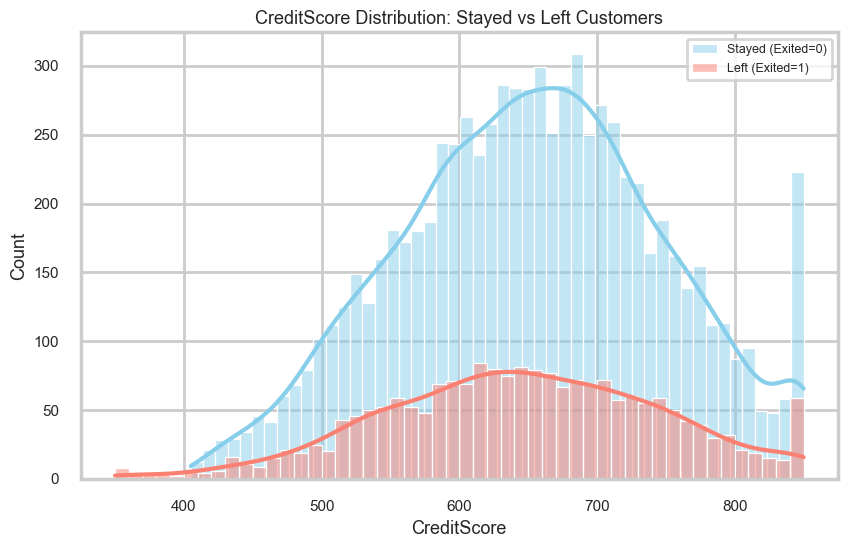

In [54]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
plt.figure(figsize=(9,6))

sns.histplot(df_0["CreditScore"], bins = 50, color="skyblue", label="Stayed (Exited=0)", kde=True)
sns.histplot(df_1["CreditScore"], bins = 50, color="salmon", label="Left (Exited=1)", kde=True)
plt.title("CreditScore Distribution: Stayed vs Left Customers", fontsize=13)
plt.xlabel("CreditScore",fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("Count",fontsize=13)
plt.legend(fontsize =9)

plt.tight_layout()
plt.show()

In [55]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
c = df_0["CreditScore"].dropna()
d = df_1["CreditScore"].dropna()
t_stat,p_value = stats.ttest_ind(c,d)
print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Results:
T-statistic: 2.7101
P-value: 0.006738


In [ ]:
# Calculate crediat score of both groups to find out which one is higher
m_left  = df_1["CreditScore"].mean()
m_stay  = df_0["CreditScore"].mean()
diff = m_left - m_stay
print(m_left, m_stay, diff)

645.3514972999509 651.8531960316463 -6.5016987316954555


### Conclusion 
- With t = 2.71 and p = 0.0067, we reject H₀ → the mean Credit Score differs between leavers and stayers.
- People who stayed in the bank had higher Credit Score (652) compared to those who left (645)

## Hypothesis 3: Balance

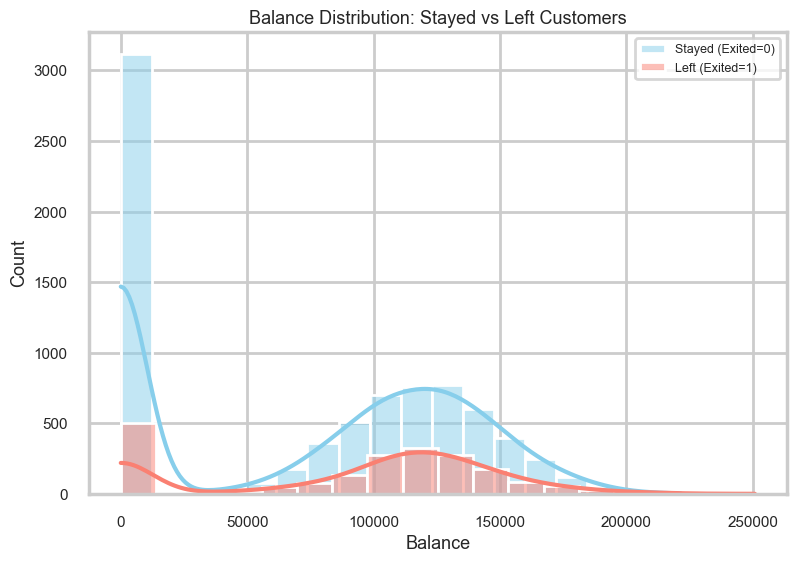

In [57]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
plt.figure(figsize=(9,6))

sns.histplot(df_0["Balance"], color="skyblue", label="Stayed (Exited=0)", kde=True)
sns.histplot(df_1["Balance"], color="salmon", label="Left (Exited=1)", kde=True)
plt.title("Balance Distribution: Stayed vs Left Customers", fontsize=13)
plt.xlabel("Balance",fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("Count",fontsize=13)
plt.legend(fontsize =9)

In [58]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
c = df_0["Balance"].dropna()
d = df_1["Balance"].dropna()
t_stat,p_value = stats.ttest_ind(c,d)
print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Results:
T-statistic: -11.9362
P-value: 0.000000


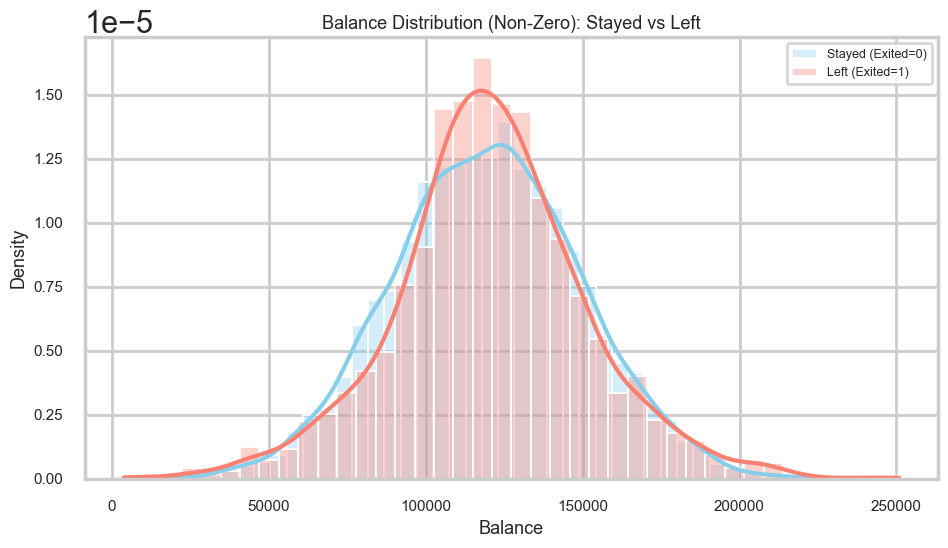

In [63]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
df0_nz = df_0[df_0["Balance"] > 0]
df1_nz = df_1[df_1["Balance"] > 0]

plt.figure(figsize=(10,6))
sns.histplot(df0_nz["Balance"], color="skyblue", label="Stayed (Exited=0)",
             bins=40, kde=True, stat="density", alpha=0.35)
sns.histplot(df1_nz["Balance"], color="salmon",  label="Left (Exited=1)",
             bins=40, kde=True, stat="density", alpha=0.35)

plt.title("Balance Distribution (Non-Zero): Stayed vs Left",fontsize=13)
plt.xlabel("Balance",fontsize=13); plt.ylabel("Density",fontsize=13)
plt.legend(fontsize =9)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [66]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.


e = df_0.loc[df_0["Balance"] > 0,"Balance"].dropna()
f = df_1.loc[df_1["Balance"] > 0,"Balance"].dropna()
t_stat,p_value = stats.ttest_ind(e,f)
print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Results:
T-statistic: -1.3748
P-value: 0.169247


## Conclusion
 #### All customers (including zeros)

- t = -11.94, p < 1e-6 → Reject H₀.

- Conclusion: Balances differ between churners and non-churners.

- Why so strong? Because there’s a huge mass at Balance = 0, and zero-balance customers have a different churn behavior. That dominates the test.

#### After excluding zero balances

- t = -1.37, p = 0.169 → Fail to reject H₀.

- Conclusion: For customers who actually keep money in the account (Balance > 0), the average balances are not significantly different.


#### Final conclusion:
- Balance distinguishes churners mainly because many churners have zero balance.
- After removing zero balances, the mean difference is not significant, so balance (when > 0) is a weak standalone predictor.”

## Hypothesis 4: Estimated Salary

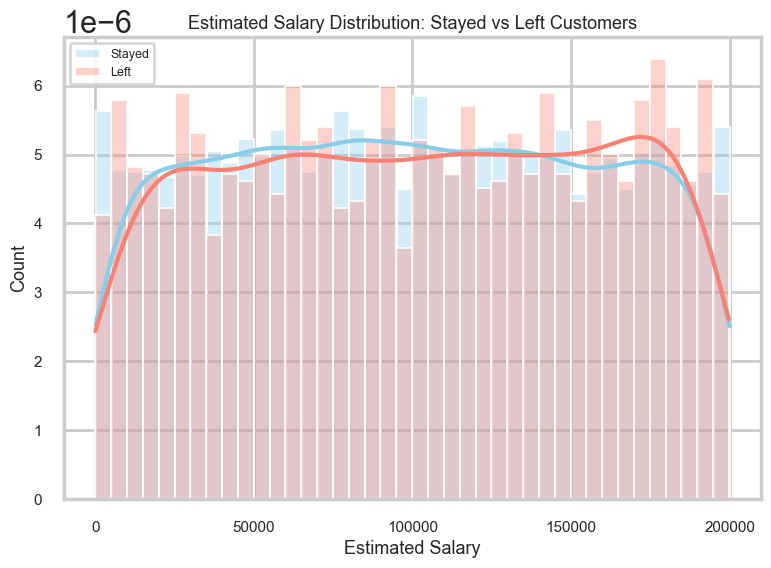

In [68]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(9,6))

sns.histplot(df_0["EstimatedSalary"], bins=40, stat="density", common_norm=False,
             color="skyblue", alpha=0.35, kde=True, label="Stayed")
sns.histplot(df_1["EstimatedSalary"], bins=40, stat="density", common_norm=False,
             color="salmon",  alpha=0.35, kde=True, label="Left")
plt.title("Estimated Salary Distribution: Stayed vs Left Customers", fontsize=13)
plt.xlabel("Estimated Salary",fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("Count",fontsize=13)
plt.legend(fontsize =9)

In [69]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
g = df_0["EstimatedSalary"].dropna()
h = df_1["EstimatedSalary"].dropna()
t_stat,p_value = stats.ttest_ind(g,h)
print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Results:
T-statistic: -1.2097
P-value: 0.226440


With t = -1.21 and p = 0.226 > 0.05, you fail to reject H₀ → there’s no evidence of a difference in average EstimatedSalary between those who left and those who stayed.


### Using Bootstrapping

In [73]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
mean_0 = df_0["EstimatedSalary"].mean()   # Stayed
mean_1 = df_1["EstimatedSalary"].mean()   # Left
overall_mean = df["EstimatedSalary"].mean()

diff_in_means = mean_1 - mean_0

df_0["EstimatedSalary_shifted"] = df_0["EstimatedSalary"] - mean_0 + overall_mean
df_1["EstimatedSalary_shifted"] = df_1["EstimatedSalary"] - mean_1 + overall_mean


print(f"Difference in means (Left − Stayed): {diff_in_means:.2f}")
print(f"Overall mean EstimatedSalary: {overall_mean:.2f}")

Difference in means (Left − Stayed): 1727.29
Overall mean EstimatedSalary: 100090.24


/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_80949/1217346012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["EstimatedSalary_shifted"] = df_0["EstimatedSalary"] - mean_0 + overall_mean
/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_80949/1217346012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["EstimatedSalary_shifted"] = df_1["EstimatedSalary"] - mean_1 + overall_mean


In [74]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
B = 10000  # number of bootstrap resamples

bs_mean_0 = bs_choice(df_0["EstimatedSalary"].dropna(), np.mean, size=B)
bs_mean_1 = bs_choice(df_1["EstimatedSalary"].dropna(), np.mean, size=B)
bs_mean_diff = bs_mean_1 - bs_mean_0  # Left − Stayed

In [75]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
# Observed difference in means (Left − Stayed)
s0 = df_0["EstimatedSalary"].dropna().to_numpy()
s1 = df_1["EstimatedSalary"].dropna().to_numpy()
obs_diff = s1.mean() - s0.mean()

#Build a null where both groups have the same mean (mean-shift)
overall = np.concatenate([s0, s1]).mean()
s0_null = s0 - s0.mean() + overall
s1_null = s1 - s1.mean() + overall

#Bootstrap the null difference
B = 10000
boot0 = bs_choice(s0_null, np.mean, size=B)
boot1 = bs_choice(s1_null, np.mean, size=B)
boot_diff = boot1 - boot0  # distribution under H0: no mean difference

#  Two-sided p-value
p_value = np.mean(np.abs(boot_diff) >= abs(obs_diff))

print(f"Observed Δ mean (Left−Stayed): {obs_diff:.2f}")
print(f"Bootstrap p-value (two-sided): {p_value:.4f}")

Observed Δ mean (Left−Stayed): 1727.29
Bootstrap p-value (two-sided): 0.2216


### Conclusion
#### Do we reject the Null Hypothesis ? Why ?
-> Fail to reject H₀.
_ Both tests agree there’s no evidence that mean EstimatedSalary differs between leavers and stayers:
- t-test: t=−1.21, p=0.226
#### Bootstrap: 
- Δ = +1,727 (Left − Stayed), p=0.222
#### Estimated Salary looks similar for customers who left vs stayed. Any difference in average salary could easily be due to random variation.
#### Salary alone is not a useful predictor of who leaves vs stays.


## Final Conclusion
What will be the most helpful feature in predicting churning?
#### Age is the single most helpful standalone feature for predicting churn in this dataset.

- We found a big, highly significant gap (≈ 7.4 years older on average for leavers), with tiny p-values from both the t-test and bootstrap. That means age strongly separates who leaves vs stays.
